# Background
## The 2002 Oakland A's
The Oakland Athletics' 2002 season was the team's 35th in Oakland, California. It was also the 102nd season in franchise history. The Athletics finished first in the American League West with a record of 103-59.
The Athletics' 2002 campaign ranks among the most famous in franchise history. Following the 2001 season, Oakland saw the departure of three key players (the lost boys). Billy Beane, the team's general manager, responded with a series of under-the-radar free agent signings. The new-look Athletics, despite a comparative lack of star power, surprised the baseball world by besting the 2001 team's regular season record. The team is most famous, however, for winning 20 consecutive games between August 13 and September 4, 2002. The Athletics' season was the subject of Michael Lewis' 2003 book Moneyball: The Art of Winning an Unfair Game (as Lewis was given the opportunity to follow the team around throughout that season)
This project is based off the book written by Michael Lewis (later turned into a movie).
## Moneyball Book
The central premise of book Moneyball is that the collective wisdom of baseball insiders (including players, managers, coaches, scouts, and the front office) over the past century is subjective and often flawed. Statistics such as stolen bases, runs batted in, and batting average, typically used to gauge players, are relics of a 19th-century view of the game and the statistics available at that time. The book argues that the Oakland A's' front office took advantage of more analytical gauges of player performance to field a team that could better compete against richer competitors in Major League Baseball (MLB).
Rigorous statistical analysis had demonstrated that on-base percentage and slugging percentage are better indicators of offensive success, and the A's became convinced that these qualities were cheaper to obtain on the open market than more historically valued qualities such as speed and contact. These observations often flew in the face of conventional baseball wisdom and the beliefs of many baseball scouts and executives.
By re-evaluating the strategies that produce wins on the field, the 2002 Athletics, with approximately US 44 million dollars in salary, were competitive with larger market teams such as the New York Yankees, who spent over US$125 million in payroll that same season.

Because of the team's smaller revenues, Oakland is forced to find players undervalued by the market, and their system for finding value in undervalued players has proven itself thus far. This approach brought the A's to the playoffs in 2002 and 2003.
In this project we'll work with some data and with the goal of trying to find replacement players for the ones lost at the start of the off-season - During the 2001–02 offseason, the team lost three key free agents to larger market teams: 2000 AL MVP Jason Giambi to the New York Yankees, outfielder Johnny Damon to the Boston Red Sox, and closer Jason Isringhausen to the St. Louis Cardinals.

The main goal of this project is to work with R on real data to try and find undervalued players to replace 3 lost players under budget while the team remains competitive!

Warning message:
"package 'IRdisplay' was built under R version 3.3.3"

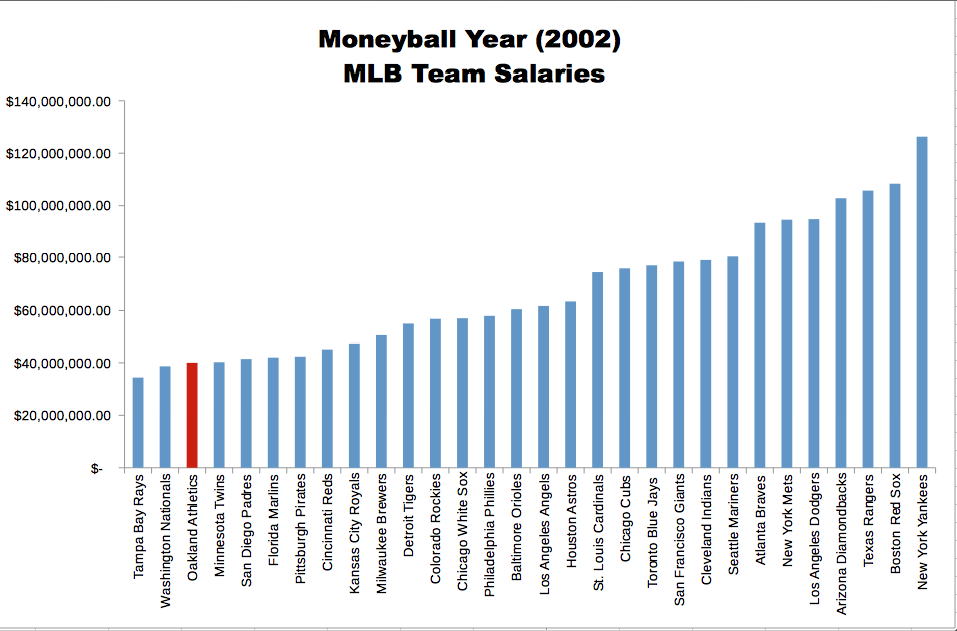

In [1]:
library("IRdisplay")
display_png(file="salary.png") 

In [2]:
batting <- read.csv('Batting.csv')
head(batting)

playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
aardsda01,2004,1,SFN,NL,11,11,0,0,0,...,0,0,0,0,0,0,0,0,0,11
aardsda01,2006,1,CHN,NL,45,43,2,0,0,...,0,0,0,0,0,0,1,0,0,45
aardsda01,2007,1,CHA,AL,25,2,0,0,0,...,0,0,0,0,0,0,0,0,0,2
aardsda01,2008,1,BOS,AL,47,5,1,0,0,...,0,0,0,1,0,0,0,0,0,5
aardsda01,2009,1,SEA,AL,73,3,0,0,0,...,0,0,0,0,0,0,0,0,0,NA
aardsda01,2010,1,SEA,AL,53,4,0,0,0,...,0,0,0,0,0,0,0,0,0,NA


In [4]:
str(batting)

'data.frame':	97889 obs. of  24 variables:
 $ playerID : Factor w/ 18107 levels "aardsda01","aaronha01",..: 1 1 1 1 1 1 1 2 2 2 ...
 $ yearID   : int  2004 2006 2007 2008 2009 2010 2012 1954 1955 1956 ...
 $ stint    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ teamID   : Factor w/ 149 levels "ALT","ANA","ARI",..: 117 35 33 16 116 116 93 80 80 80 ...
 $ lgID     : Factor w/ 6 levels "AA","AL","FL",..: 4 4 2 2 2 2 2 4 4 4 ...
 $ G        : int  11 45 25 47 73 53 1 122 153 153 ...
 $ G_batting: int  11 43 2 5 3 4 NA 122 153 153 ...
 $ AB       : int  0 2 0 1 0 0 NA 468 602 609 ...
 $ R        : int  0 0 0 0 0 0 NA 58 105 106 ...
 $ H        : int  0 0 0 0 0 0 NA 131 189 200 ...
 $ X2B      : int  0 0 0 0 0 0 NA 27 37 34 ...
 $ X3B      : int  0 0 0 0 0 0 NA 6 9 14 ...
 $ HR       : int  0 0 0 0 0 0 NA 13 27 26 ...
 $ RBI      : int  0 0 0 0 0 0 NA 69 106 92 ...
 $ SB       : int  0 0 0 0 0 0 NA 2 3 2 ...
 $ CS       : int  0 0 0 0 0 0 NA 2 1 4 ...
 $ BB       : int  0 0 0 0 0 0 NA 28 49 37 ...
 $ S

## Feature Engineering
We need to add three more statistics that were used in Moneyball! These are:

1. Batting Average  
2. On Base Percentage  
3. Slugging Percentage

In [5]:
# Batting Average is equal to H (Hits) divided by AB (At Base)
batting$BA <- batting$H / batting$AB

In [6]:
tail(batting$BA, 5)

[1] 0.1230769 0.2746479 0.1470588 0.2745098 0.2138728

In [7]:
# On Base Percentage
batting$OBP <- (batting$H + batting$BB + batting$HBP) / (batting$AB + batting$BB + batting$HBP + batting$SF)

# Creating X1B (Singles)
batting$X1B <- batting$H - batting$X2B - batting$X3B - batting$HR

# Creating Slugging Average (SLG)
batting$SLG <- ((1 * batting$X1B) + (2 * batting$X2B) + (3 * batting$X3B) + (4 * batting$HR)) / batting$AB

In [8]:
str(batting)

'data.frame':	97889 obs. of  28 variables:
 $ playerID : Factor w/ 18107 levels "aardsda01","aaronha01",..: 1 1 1 1 1 1 1 2 2 2 ...
 $ yearID   : int  2004 2006 2007 2008 2009 2010 2012 1954 1955 1956 ...
 $ stint    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ teamID   : Factor w/ 149 levels "ALT","ANA","ARI",..: 117 35 33 16 116 116 93 80 80 80 ...
 $ lgID     : Factor w/ 6 levels "AA","AL","FL",..: 4 4 2 2 2 2 2 4 4 4 ...
 $ G        : int  11 45 25 47 73 53 1 122 153 153 ...
 $ G_batting: int  11 43 2 5 3 4 NA 122 153 153 ...
 $ AB       : int  0 2 0 1 0 0 NA 468 602 609 ...
 $ R        : int  0 0 0 0 0 0 NA 58 105 106 ...
 $ H        : int  0 0 0 0 0 0 NA 131 189 200 ...
 $ X2B      : int  0 0 0 0 0 0 NA 27 37 34 ...
 $ X3B      : int  0 0 0 0 0 0 NA 6 9 14 ...
 $ HR       : int  0 0 0 0 0 0 NA 13 27 26 ...
 $ RBI      : int  0 0 0 0 0 0 NA 69 106 92 ...
 $ SB       : int  0 0 0 0 0 0 NA 2 3 2 ...
 $ CS       : int  0 0 0 0 0 0 NA 2 1 4 ...
 $ BB       : int  0 0 0 0 0 0 NA 28 49 37 ...
 $ S

In [9]:
sal <- read.csv('Salaries.csv')
head(sal)

yearID,teamID,lgID,playerID,salary
1985,BAL,AL,murraed02,1472819
1985,BAL,AL,lynnfr01,1090000
1985,BAL,AL,ripkeca01,800000
1985,BAL,AL,lacyle01,725000
1985,BAL,AL,flanami01,641667
1985,BAL,AL,boddimi01,625000


In [10]:
summary(sal$yearID)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1985    1993    1999    1999    2006    2013 

In [11]:
summary(batting$yearID)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1871    1931    1970    1962    1995    2013 

In [12]:
batting <- subset(batting,yearID >= 1985)
summary(batting$yearID)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1985    1993    2000    2000    2007    2013 

In [13]:
combo <- merge(batting,sal,by=c('playerID','yearID'))
head(combo)

playerID,yearID,stint,teamID.x,lgID.x,G,G_batting,AB,R,H,...,SF,GIDP,G_old,BA,OBP,X1B,SLG,teamID.y,lgID.y,salary
aardsda01,2004,1,SFN,NL,11,11,0,0,0,...,0,0,11,NaN,NaN,0,NaN,SFN,NL,300000
aardsda01,2007,1,CHA,AL,25,2,0,0,0,...,0,0,2,NaN,NaN,0,NaN,CHA,AL,387500
aardsda01,2008,1,BOS,AL,47,5,1,0,0,...,0,0,5,0,0,0,0,BOS,AL,403250
aardsda01,2009,1,SEA,AL,73,3,0,0,0,...,0,0,NA,NaN,NaN,0,NaN,SEA,AL,419000
aardsda01,2010,1,SEA,AL,53,4,0,0,0,...,0,0,NA,NaN,NaN,0,NaN,SEA,AL,2750000
aardsda01,2012,1,NYA,AL,1,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NYA,AL,500000


In [14]:
summary(combo)

      playerID         yearID         stint          teamID.x     lgID.x    
 moyerja01:   27   Min.   :1985   Min.   :1.000   LAN    :  940   AA:    0  
 thomeji01:   25   1st Qu.:1993   1st Qu.:1.000   PHI    :  937   AL:12292  
 weathda01:   25   Median :1999   Median :1.000   BOS    :  935   FL:    0  
 vizquom01:   24   Mean   :1999   Mean   :1.098   NYA    :  928   NL:13105  
 gaettga01:   23   3rd Qu.:2006   3rd Qu.:1.000   CLE    :  920   PL:    0  
 griffke02:   23   Max.   :2013   Max.   :4.000   SDN    :  914   UA:    0  
 (Other)  :25250                                  (Other):19823             
       G            G_batting            AB              R         
 Min.   :  1.00   Min.   :  0.00   Min.   :  0.0   Min.   :  0.00  
 1st Qu.: 26.00   1st Qu.:  8.00   1st Qu.:  5.0   1st Qu.:  0.00  
 Median : 50.00   Median : 42.00   Median : 85.0   Median :  9.00  
 Mean   : 64.06   Mean   : 57.58   Mean   :182.4   Mean   : 24.71  
 3rd Qu.:101.00   3rd Qu.:101.00   3rd Qu.:3

In [15]:
lost_players <- subset(combo,playerID %in% c('giambja01','damonjo01','saenzol01'))
head(lost_players)

,playerID,yearID,stint,teamID.x,lgID.x,G,G_batting,AB,R,H,...,SF,GIDP,G_old,BA,OBP,X1B,SLG,teamID.y,lgID.y,salary
5135,damonjo01,1995,1,KCA,AL,47,47,188,32,53,...,3,2,47,0.2819149,0.3235294,34,0.4414894,KCA,AL,109000
5136,damonjo01,1996,1,KCA,AL,145,145,517,61,140,...,5,4,145,0.2707930,0.3129496,107,0.3675048,KCA,AL,180000
5137,damonjo01,1997,1,KCA,AL,146,146,472,70,130,...,1,3,146,0.2754237,0.3378378,102,0.3855932,KCA,AL,240000
5138,damonjo01,1998,1,KCA,AL,161,161,642,104,178,...,3,4,161,0.2772586,0.3394625,120,0.4392523,KCA,AL,460000
5139,damonjo01,1999,1,KCA,AL,145,145,583,101,179,...,4,13,145,0.3070326,0.3789954,117,0.4768439,KCA,AL,2100000
5140,damonjo01,2000,1,KCA,AL,159,159,655,136,214,...,12,7,159,0.3267176,0.3819918,146,0.4946565,KCA,AL,4000000


In [16]:
# Since all these players were lost in after 2001 in the offseason, let's only concern ourselves with the data from 2001
lost_players <- subset(lost_players,yearID == 2001)
lost_players <- lost_players[,c('playerID','H','X2B','X3B','HR','OBP','SLG','BA','AB')]
head(lost_players)

,playerID,H,X2B,X3B,HR,OBP,SLG,BA,AB
5141,damonjo01,165,34,4,9,0.3235294,0.3633540,0.2562112,644
7878,giambja01,178,47,2,38,0.4769001,0.6596154,0.3423077,520
20114,saenzol01,67,21,1,9,0.2911765,0.3836066,0.2196721,305


## Replacement players
Now we have all the information we need! Let's find Replacement Players for the key three players we lost! However, we have three constraints:  
1. The total combined salary of the three players can not exceed 15 million dollars.  
2. Their combined number of At Bats (AB) needs to be equal to or greater than the lost players.  
3. Their mean OBP had to equal to or greater than the mean OBP of the lost players.

In [19]:
library(dplyr)
avail.players <- filter(combo, yearID==2001)

Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Warning message:
"Removed 168 rows containing missing values (geom_point)."

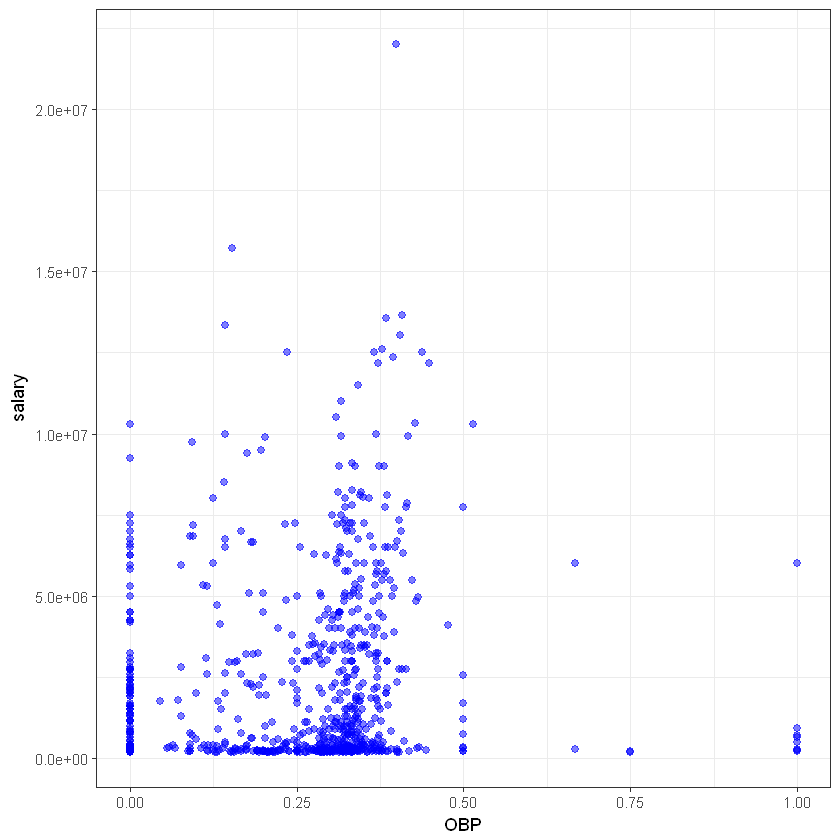

In [24]:
library(ggplot2)
ggplot(avail.players,aes(x=OBP, y=salary)) + geom_point(size=2, color='blue', alpha=0.5) + theme_bw()

In [25]:
# Looks like there is no point in paying above 8 million or so (I'm just eyeballing this number). 
# I'll choose that as a cutt off point. There are also a lot of players with OBP==0. Let's get rid of them too.
avail.players <- filter(avail.players, salary<8000000, OBP>0)

In [26]:
# The total AB of the lost players is 1469.
# I would probably cut off my avail.players at 1500/3 = 500 AB.
avail.players <- filter(avail.players, AB >= 500)

In [27]:
possible_candidates <- head(arrange(avail.players, desc(OBP)), 10)
possible_candidates <- possible_candidates[, c('playerID','OBP','AB','salary')]
possible_candidates

playerID,OBP,AB,salary
giambja01,0.4769001,520,4103333
heltoto01,0.4316547,587,4950000
berkmla01,0.4302326,577,305000
gonzalu01,0.4285714,609,4833333
thomeji01,0.4161491,526,7875000
alomaro01,0.4146707,575,7750000
edmonji01,0.4102142,500,6333333
gilesbr02,0.4035608,576,7333333
pujolal01,0.4029630,590,200000
olerujo01,0.4011799,572,6700000


In [28]:
# Combined AB for lost players
sum(lost_players$AB)

[1] 1469

In [29]:
# Avg OBP for lost players
mean(lost_players$OBP)

[1] 0.3638687

In [45]:
# My choices:
result <- possible_candidates[c(3, 4, 9),]
result

,playerID,OBP,AB,salary
3,berkmla01,0.4302326,577,305000
4,gonzalu01,0.4285714,609,4833333
9,pujolal01,0.4029630,590,200000


In [46]:
cat(sprintf('Combined AB: %d \n', sum(result$AB)))
cat(sprintf('Mean OBP: %.4f \n', mean(result$OBP)))
cat(sprintf('Total Salary: %d', sum(result$salary)))

Combined AB: 1776 
Mean OBP: 0.4206 
Total Salary: 5338333

### My replacement players:
Total Salary is 5.34 million << 15 million  
Mean OBP is 0.4206 > 0.3639  
Sum of AB is 1776 > 1469